# Predicción de la longitud de pétalo de Iris

![Descripción](../../resources/08-nn.png)

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [16]:
session = tf.Session()
iris = datasets.load_iris()

In [17]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [18]:
x_vals.shape, y_vals.shape

((150, 3), (150,))

In [19]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2)

x_train = np.nan_to_num(MinMaxScaler().fit_transform(x_train))
x_test = np.nan_to_num(MinMaxScaler().fit_transform(x_test))

In [21]:
x_train.shape, y_train.shape

((120, 3), (120,))

In [22]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [23]:
hidden_layer_nodes = 5

In [24]:
# Número de variables de entrada (3) como filas y número de nodos (hidden_layer_nodes) como columna 
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))

A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

# LAS DIMENSIONES SE ENTIENDEN BIEN VIENDO LA IMAGEN DE ARRIBA DEL TODO!

In [25]:
# Aplicamos ya la función de activación ReLu
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1)) # h1, h2, etc 
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [26]:
loss = tf.reduce_mean(tf.square(tf.subtract(final_output, y_target)))

optimizer = tf.train.GradientDescentOptimizer(0.005)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [27]:
loss_train_vector = []
loss_test_vector = []

for i in range(1000):
    rand_idx = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_idx]
    rand_y = np.transpose([y_train[rand_idx]])
    
    # Entrenamiento
    session.run(train, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_train_vector.append(np.sqrt(temp_train_loss))
    
    temp_test_loss = session.run(loss, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})
    loss_test_vector.append(np.sqrt(temp_test_loss))

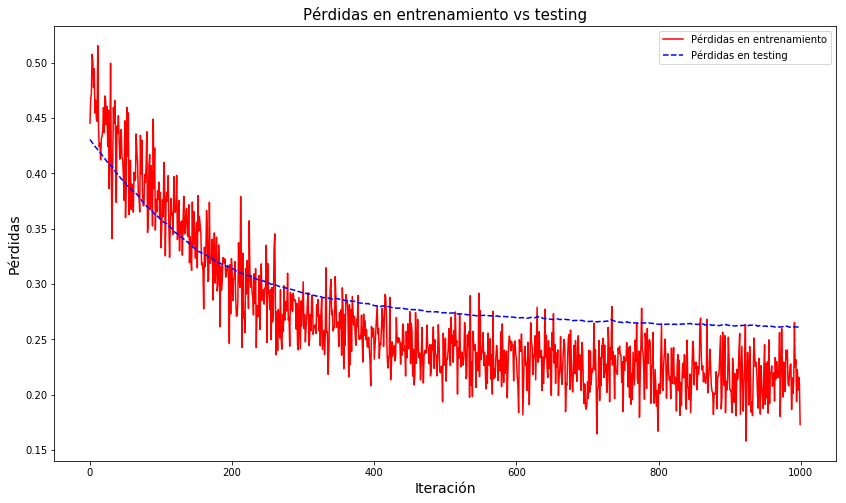

In [28]:
plt.figure(figsize=(14,8))
plt.plot(loss_train_vector, "r-", label="Pérdidas en entrenamiento")
plt.plot(loss_test_vector, "b--", label="Pérdidas en testing")
plt.title("Pérdidas en entrenamiento vs testing", fontsize=15)
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Pérdidas", fontsize=14)
plt.legend(loc="upper right")
plt.show()

Típico problema de **OVERFITTING** $\rightarrow$ Cuando la función de pérdidas del conjunto de entrenamiento sigue descendiendo mientras que la de test permanece constante (como en este caso)